# Visuaulization Notebook
This notebook visualize results of registration systems following the metrics that we set before.

In [32]:
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import copy
import numpy as np
import sys
from collections import defaultdict

if "../" not in sys.path:
    sys.path.append("../")

from registration.student import Degree
from registration.course import Semester
from registration.registration_system.lottery_system import LotterySystem
from registration.registration_system.major_priority_system import MajorPrioritySystem
from registration.registration_system.grade_priority_system import GradePrioritySystem
from registration.registration_system.top3_priority_system import Top3PrioritySystem
from registration.registration_system.top3_based_1_system import Top3Based1System
from registration.registration_system.top3_based_2_system import Top3Based2System
from registration.registration_system.system_type import SystemType

## Simulate Registration System

In [33]:
DATA_PATH = Path("../data/pickle")

result_bachelor_students_dict = defaultdict(list)

In [34]:
# check if the pickle path is valid
assert DATA_PATH.exists()

### Set Semester

In [4]:
semester = Semester.value_of(input("What semester do you want to visualize? (in Korean) "))
semester

### Run Systems

In [36]:
# Lottery Systems
students_dict = pickle.load(open(DATA_PATH / semester.name.lower() / "students_dict.pickle", "rb"))
courses_dict = pickle.load(open(DATA_PATH / semester.name.lower() / "courses_dict.pickle", "rb"))

students = list(students_dict.values())

lottery_system = LotterySystem(courses_dict)
result_students = lottery_system.register_students(students)
result_bachelor_students_dict[SystemType.LOTTERY] = list(filter(lambda student: student.degree == Degree.BACHELOR, copy.deepcopy(result_students)))

In [37]:
# check if the results are valid
print(len(courses_dict), "are registered with lottery system")

print(len(students), "students are in the original list")
print(len(result_students), "students enrolled")
assert len(students) == len(result_students)

print(len(result_bachelor_students_dict[SystemType.LOTTERY]), "bachelor students are enrolled")

assert all(student.degree == Degree.BACHELOR for student in result_bachelor_students_dict[SystemType.LOTTERY])

4184 are registered with lottery system
10992 students are in the original list
10992 students enrolled
3570 bachelor students are enrolled


In [38]:
# Major Priority System
students_dict = pickle.load(open(DATA_PATH / semester.name.lower() / "students_dict.pickle", "rb"))
courses_dict = pickle.load(open(DATA_PATH / semester.name.lower() / "courses_dict.pickle", "rb"))

students = list(students_dict.values())

major_priority_system = MajorPrioritySystem(courses_dict)
result_students = major_priority_system.register_students(students, (0.3, 0.3, 0.1))
result_bachelor_students_dict[SystemType.MAJOR_PRIORITY] = list(filter(lambda student: student.degree == Degree.BACHELOR, copy.deepcopy(result_students)))

In [39]:
# check if the results are valid
print(len(courses_dict), "are registered with major priority system")

print(len(students), "students are in the original list")
print(len(result_students), "students enrolled")
assert len(students) == len(result_students)

print(len(result_bachelor_students_dict[SystemType.MAJOR_PRIORITY]), "bachelor students are enrolled")

assert all(student.degree == Degree.BACHELOR for student in result_bachelor_students_dict[SystemType.MAJOR_PRIORITY])

4184 are registered with major priority system
10992 students are in the original list
10992 students enrolled
3570 bachelor students are enrolled


In [40]:
# Grade Priority System: Change graduate standard and probability to see various results
students_dict = pickle.load(open(DATA_PATH / semester.name.lower() / "students_dict.pickle", "rb"))
courses_dict = pickle.load(open(DATA_PATH / semester.name.lower() / "courses_dict.pickle", "rb"))

students = list(students_dict.values())

grade_priority_system = GradePrioritySystem(courses_dict)
result_students = grade_priority_system.register_students(students, 2018, 0.5)
result_bachelor_students_dict[SystemType.GRADE_PRIORITY] = list(filter(lambda student: student.degree == Degree.BACHELOR, copy.deepcopy(result_students)))

In [41]:
# check if the results are valid
print(len(courses_dict), "are registered with grade priority system")

print(len(students), "students are in the original list")
print(len(result_students), "students enrolled")
assert len(students) == len(result_students)

print(len(result_bachelor_students_dict[SystemType.GRADE_PRIORITY]), "bachelor students are enrolled")

assert all(student.degree == Degree.BACHELOR for student in result_bachelor_students_dict[SystemType.GRADE_PRIORITY])

4184 are registered with grade priority system
10992 students are in the original list
10992 students enrolled
3570 bachelor students are enrolled


In [42]:
# Top3 Priority System: Change distributions of student preferences to see various results
students_dict = pickle.load(open(DATA_PATH / semester.name.lower() / "students_dict.pickle", "rb"))
courses_dict = pickle.load(open(DATA_PATH / semester.name.lower() / "courses_dict.pickle", "rb"))

students = list(students_dict.values())

top3_priority_system = Top3PrioritySystem(courses_dict)
prioritized_students = top3_priority_system.designate_priority(students, (0.4, 0.4, 0.2))
result_students = top3_priority_system.register_students(prioritized_students, (0.2, 0.2, 0.2))
result_bachelor_students_dict[SystemType.TOP3_PRIORITY] = list(filter(lambda student: student.degree == Degree.BACHELOR, copy.deepcopy(result_students)))

In [43]:
# check if the results are valid
print(len(courses_dict), "are registered with top3 priority system")

print(len(students), "students are in the original list")
print(len(result_students), "students enrolled")
assert len(students) == len(result_students)

print(len(result_bachelor_students_dict[SystemType.TOP3_PRIORITY]), "bachelor students are enrolled")

assert all(student.degree == Degree.BACHELOR for student in result_bachelor_students_dict[SystemType.TOP3_PRIORITY])

4184 are registered with top3 priority system
10992 students are in the original list
10992 students enrolled
3570 bachelor students are enrolled


In [44]:
# Top3-based System 1: Change distributions to see various results
students_dict = pickle.load(open(DATA_PATH / semester.name.lower() / "students_dict.pickle", "rb"))
courses_dict = pickle.load(open(DATA_PATH / semester.name.lower() / "courses_dict.pickle", "rb"))

students = list(students_dict.values())

top3_based_1_system = Top3Based1System(courses_dict)
prioritized_students = top3_based_1_system.designate_priority(students, (0.4, 0.4, 0.2))
result_students = top3_based_1_system.register_students(prioritized_students, (0.2, 0.2, 0.2), 0.6, 0.3, 2018)
result_bachelor_students_dict[SystemType.TOP3_BASED1] = list(filter(lambda student: student.degree == Degree.BACHELOR, copy.deepcopy(result_students)))

In [45]:
# check if the results are valid
print(len(courses_dict), "are registered with top3 based system 1")

print(len(students), "students are in the original list")
print(len(result_students), "students enrolled")
assert len(students) == len(result_students)

print(len(result_bachelor_students_dict[SystemType.TOP3_BASED1]), "bachelor students are enrolled")

assert all(student.degree == Degree.BACHELOR for student in result_bachelor_students_dict[SystemType.TOP3_BASED1])

4184 are registered with top3 based system 1
10992 students are in the original list
10992 students enrolled
3570 bachelor students are enrolled


In [46]:
# Top3-based System 2: Change distributions to see various results
students_dict = pickle.load(open(DATA_PATH / semester.name.lower() / "students_dict.pickle", "rb"))
courses_dict = pickle.load(open(DATA_PATH / semester.name.lower() / "courses_dict.pickle", "rb"))

students = list(students_dict.values())

top3_based_2_system = Top3Based2System(courses_dict)
prioritized_students = top3_based_2_system.designate_priority(students, (0.4, 0.4, 0.2))
result_students = top3_based_2_system.register_students(prioritized_students, (0.2, 0.2, 0.2), 0.5, 0.3, 2018)
result_bachelor_students_dict[SystemType.TOP3_BASED2] = list(filter(lambda student: student.degree == Degree.BACHELOR, copy.deepcopy(result_students)))

In [47]:
# check if the results are valid
print(len(courses_dict), "are registered with top3 based system 2")

print(len(students), "students are in the original list")
print(len(result_students), "students enrolled")
assert len(students) == len(result_students)

print(len(result_bachelor_students_dict[SystemType.TOP3_BASED2]), "bachelor students are enrolled")

assert all(student.degree == Degree.BACHELOR for student in result_bachelor_students_dict[SystemType.TOP3_BASED2])

4184 are registered with top3 based system 2
10992 students are in the original list
10992 students enrolled
3570 bachelor students are enrolled


## Plots

In [48]:
PLOT_PATH = Path("./plots/")
if not PLOT_PATH.exists():
    PLOT_PATH.mkdir()

plot_save_path = PLOT_PATH / semester.name.lower()
if not plot_save_path.exists():
    plot_save_path.mkdir()

### Credit Related Plots
We are going to see how many credits students were able to register through each registration system.

In [49]:
from collections import defaultdict

from registration.major import MajorType
from visualization.metrics.credit_distribution import get_credit_distribution
from visualization.metrics.grade_distribution import get_grade_distribution
from visualization.metrics.major_distribution import get_major_distribution
from visualization.metrics.reactiveness_distribution import get_reactiveness_distribution

MAX_CREDIT = 24

In [50]:
credit_distributions_dict = {
    key: get_credit_distribution(students, MAX_CREDIT)
    for key, students in result_bachelor_students_dict.items()
}

#### Credit Distribution as Table

In [51]:
for system_name, credit_distribution in credit_distributions_dict.items():
    print(system_name.name, "has", len(credit_distribution), "credit bars")
    total_students = sum(credit_distribution.values())
    sum_of_credit_distribution = sum([credit * num_students for credit, num_students in credit_distribution.items()])
    average_credits = sum_of_credit_distribution / total_students
    average_students = total_students / len(credit_distribution)
    # TODO: 학생 수의 표준편차? 학생들의 credit의 표준편차? 지금은 학생 수의 표준편차
    std_students = np.std(list(credit_distribution.values()))
    
    print(system_name)
    print("=========================")
    print("Total students:", total_students)
    print("Credit range:", min(credit_distribution.keys()), "~", max(credit_distribution.keys()))
    print("Average credits of students:", average_credits)
    print("Average students distribution:", average_students)    
    print("Std of students in the distribution:", std_students)
    print("=========================")
    print("")

LOTTERY has 25 credit bars
SystemType.LOTTERY
Total students: 3041
Credit range: 0 ~ 24
Average credits of students: 16.536336731338377
Average students distribution: 121.64
Std of students in the distribution: 111.7625626048365

MAJOR_PRIORITY has 25 credit bars
SystemType.MAJOR_PRIORITY
Total students: 3103
Credit range: 0 ~ 24
Average credits of students: 16.16822429906542
Average students distribution: 124.12
Std of students in the distribution: 108.05047709288469

GRADE_PRIORITY has 25 credit bars
SystemType.GRADE_PRIORITY
Total students: 3102
Credit range: 0 ~ 24
Average credits of students: 16.196969696969695
Average students distribution: 124.08
Std of students in the distribution: 108.32208269785069

TOP3_PRIORITY has 25 credit bars
SystemType.TOP3_PRIORITY
Total students: 3107
Credit range: 0 ~ 24
Average credits of students: 16.219504345027357
Average students distribution: 124.28
Std of students in the distribution: 108.76194922857903

TOP3_BASED1 has 25 credit bars
SystemT

#### Credit Distribution as Pie Chart

In [52]:
def plot_credit_pie_chart(credit_distributions_dict, threshold=9):    
    plt.figure(figsize=(20,15))    
    rows = 2
    cols = 3
    
    # get number of students with credits above threshold of each system
    threshold_ratios_dict = defaultdict(tuple)
    for system_name, credit_distribution in credit_distributions_dict.items():    
        all_credits = sum(credit_distribution.values())
        above_threshold = sum(credit_distribution[i] for i in range(threshold, MAX_CREDIT+1))
        below_threshold = all_credits - above_threshold
        threshold_ratios_dict[system_name] = (below_threshold / all_credits * 100, above_threshold / all_credits * 100)
    
    # plot pie chart
    labels = ["Below Threshold", "Above Threshold"]
    for i, (system_name, ratio) in enumerate(threshold_ratios_dict.items()):
        # Place this plot in (1, numplots, i + 1)
        # row = i // 3 + 1
        # col = i % 3 + 1
        plt.subplot(rows, cols, i + 1)
        plt.pie(ratio, labels=labels, autopct='%1.1f%%', startangle=90)
        plt.title(f"{system_name.value} System")
        plt.axis('equal')

    plt.savefig(plot_save_path / f"credit_pie_chart_threshold_{threshold}.png")
    plt.show()
    


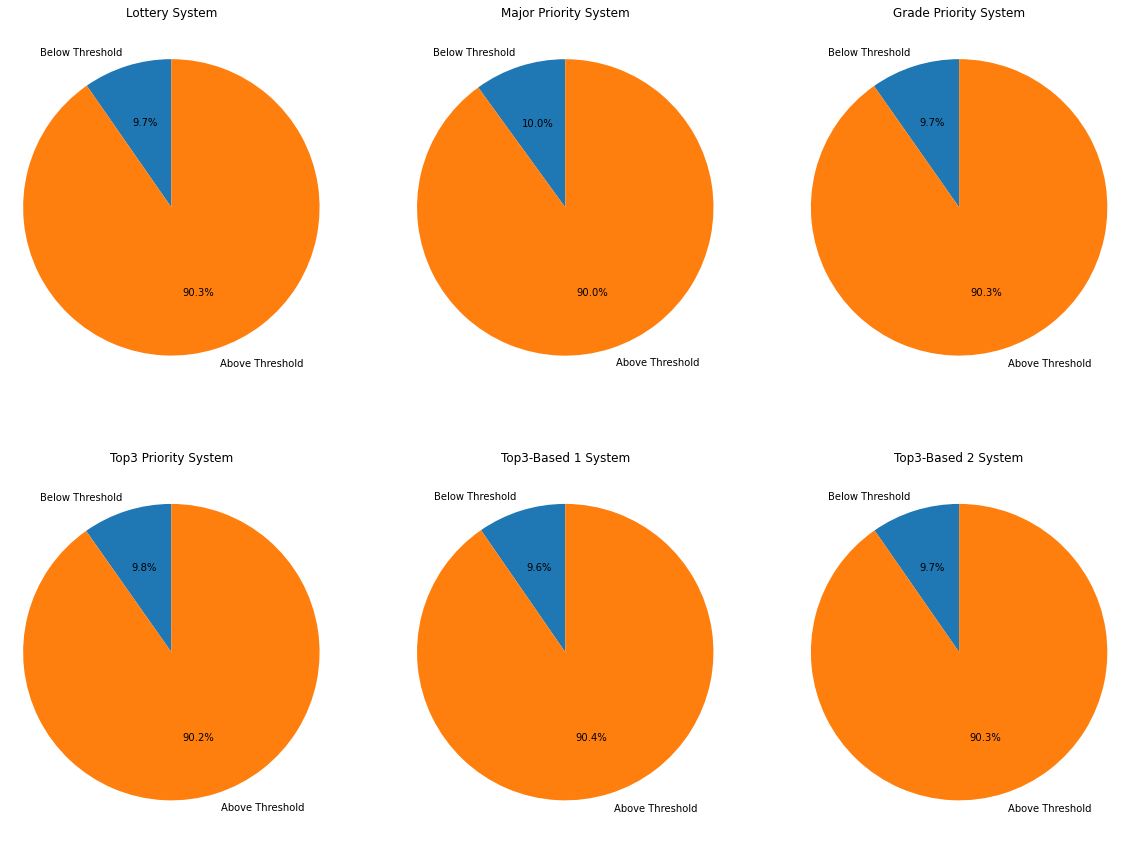

In [53]:
plot_credit_pie_chart(credit_distributions_dict, threshold=9)

### Grade Distribution

In [54]:
course_filters_dict = {
    "All Lottery Courses": lambda course: course.is_lottery
}

grade_distributions_dict = {
    key: get_grade_distribution(students, course_filters_dict, threshold=2021) 
    for key, students in result_bachelor_students_dict.items()
}

#### Grade Distribution as Bar Plot

In [55]:
def plot_grade_bar_plot(grade_distributions_dict, threshold=2021):
    plt.figure(figsize=(20,8))

    system_keys = [key.value for key in grade_distributions_dict.keys()]
    width = 0.35
    
    # Transpose the result to get the grade distribution of each system as plot
    transposed_distributions = {
        "Below Threshold": [],
        "Above Threshold": []
    }
    # For sorted results, use system_keys instead of grade_distribution_dict.items()    
    for system_key in system_keys:
        grade_distribution = grade_distributions_dict[system_key]
        assert "All Lottery Courses" in grade_distribution.keys()
        distribution = grade_distribution["All Lottery Courses"]
        
        assert "Below Threshold" in distribution.keys() and "Above Threshold" in distribution.keys()
        
        below_average = sum(distribution["Below Threshold"]) / len(distribution["Below Threshold"])
        above_average = sum(distribution["Above Threshold"]) / len(distribution["Above Threshold"])
        print(f"{system_key}'s (below, above) = ({below_average}, {above_average})")
        
        transposed_distributions["Below Threshold"].append(below_average)
        transposed_distributions["Above Threshold"].append(above_average)

    # Actual plots
    x_locations = np.arange(len(system_keys))
    plt.bar(x_locations - width/2, transposed_distributions["Below Threshold"], width, align="center", label=f"Non-senior in {threshold}")
    plt.bar(x_locations + width/2, transposed_distributions["Above Threshold"], width, align="center", label=f"Senior in {threshold}")

    # Mark the axis
    plt.xlabel("System Name")
    plt.xticks(range(len(system_keys)), system_keys)
    plt.ylabel("Number of credits earned by random")
    
    # TODO: Adjust the y-axis
    
    # Make titles and other labels
    plt.title(f"Grade distribution for {threshold}")
    plt.legend(fontsize=15)
    plt.savefig(plot_save_path / f"grade_bar_threshold_{threshold}.png")
    
    plt.show()

Lottery's (below, above) = (5.776432231020028, 4.692199578355587)
Major Priority's (below, above) = (5.292501164415463, 4.05621925509487)
Grade Priority's (below, above) = (4.908709827666511, 4.700632466619817)
Top3 Priority's (below, above) = (5.27619934792734, 4.080815179198876)
Top3-Based 1's (below, above) = (5.168607359105729, 4.251581166549543)
Top3-Based 2's (below, above) = (5.270610153702841, 4.080815179198876)


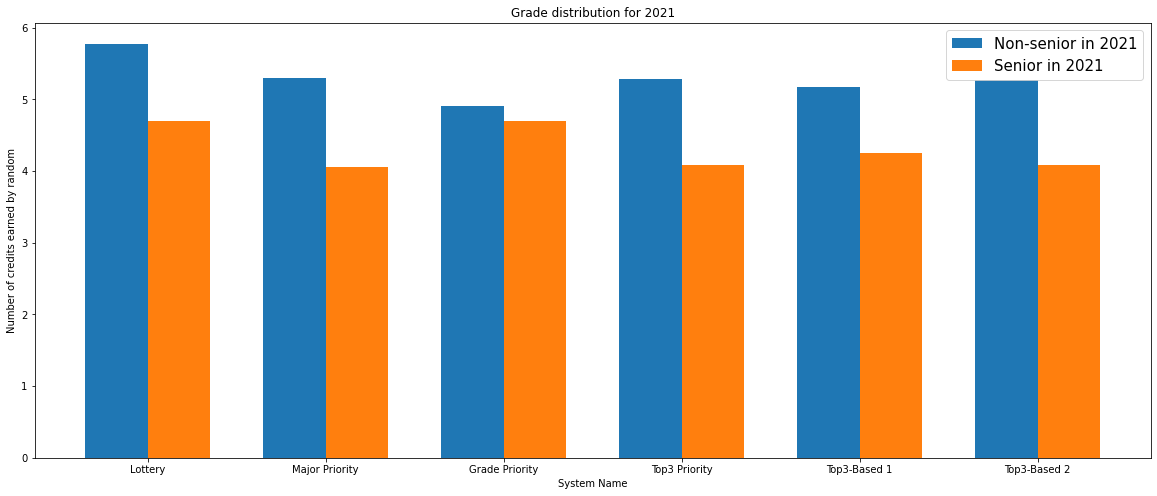

In [56]:
plot_grade_bar_plot(grade_distributions_dict, threshold=2021)

### Major Distribution

In [57]:
major_distributions_dict = {
    key: get_major_distribution(students) 
    for key, students in result_bachelor_students_dict.items()
}

#### Major Distribution as Bar Plot

In [58]:
def plot_major_bar_plot(major_distributions_dict, threshold=2021):
    system_keys = [key.value for key in grade_distributions_dict.keys()]
    major_keys = list(major_distributions_dict[system_keys[0]].keys())
    x_location = np.arange(len(system_keys))
    width = 0.25
        
    # Transpose the result to get the major distribution of each system as plot
    transposed_distributions = {
        key: {
            MajorType.MAJOR: [],
            MajorType.DOUBLE_MAJOR: [],
            MajorType.MINOR: [],
            MajorType.ELSE: []
        } for key in major_keys
    }
        
    # For sorted results, use system_keys instead of grade_distribution_dict.items()    
    for system_key in system_keys:
        major_distribution = major_distributions_dict[system_key]

        assert transposed_distributions.keys() == major_distribution.keys()
        
        for major_key in major_keys:
            distribution = major_distribution[major_key]
            aggregated_distribution = {
                MajorType.MAJOR: sum(distribution[MajorType.MAJOR]) / len(distribution[MajorType.MAJOR]) if len(distribution[MajorType.MAJOR]) != 0 else 0,
                MajorType.DOUBLE_MAJOR: sum(distribution[MajorType.DOUBLE_MAJOR]) / len(distribution[MajorType.DOUBLE_MAJOR]) if len(distribution[MajorType.DOUBLE_MAJOR]) != 0 else 0,
                MajorType.MINOR: sum(distribution[MajorType.MINOR]) / len(distribution[MajorType.MINOR]) if len(distribution[MajorType.MINOR]) != 0 else 0,
                MajorType.ELSE: sum(distribution[MajorType.ELSE]) / len(distribution[MajorType.ELSE]) if len(distribution[MajorType.ELSE]) != 0 else 0,
            }
            
            transposed_distributions[major_key][MajorType.MAJOR].append(aggregated_distribution[MajorType.MAJOR])
            transposed_distributions[major_key][MajorType.DOUBLE_MAJOR].append(aggregated_distribution[MajorType.DOUBLE_MAJOR])
            transposed_distributions[major_key][MajorType.MINOR].append(aggregated_distribution[MajorType.MINOR])
            transposed_distributions[major_key][MajorType.ELSE].append(aggregated_distribution[MajorType.ELSE])
        
    # Actual plots
    for major_key in major_keys:
        x_locations = np.arange(len(system_keys))
        plt.figure(figsize=(15,8))        
        plt.bar(x_locations - width * 0.75, transposed_distributions[major_key][MajorType.MAJOR], width=width/2, align='center', label=MajorType.MAJOR.value)
        plt.bar(x_locations - width * 0.25, transposed_distributions[major_key][MajorType.DOUBLE_MAJOR], width=width/2, align='center', label=MajorType.DOUBLE_MAJOR.value)
        plt.bar(x_locations + width * 0.25, transposed_distributions[major_key][MajorType.MINOR], width=width/2, align='center', label=MajorType.MINOR.value)
        plt.bar(x_locations + width * 0.75, transposed_distributions[major_key][MajorType.ELSE], width=width/2, align='center', label=MajorType.ELSE.value)

        # Mark the axis
        plt.xlabel("System Name")
        plt.xticks(range(len(system_keys)), system_keys)
        plt.ylabel("Ratios of credits earned by random")

        # Mark the title, labels        
        plt.xticks(x_location, system_keys)
        plt.title(f"Major distribution for {threshold} in {major_key.name}")
        plt.legend()
        plt.tight_layout()
        plt.savefig(plot_save_path / f"major_bar_major_{major_key.name}_threshold_{threshold}.png")
        plt.show()

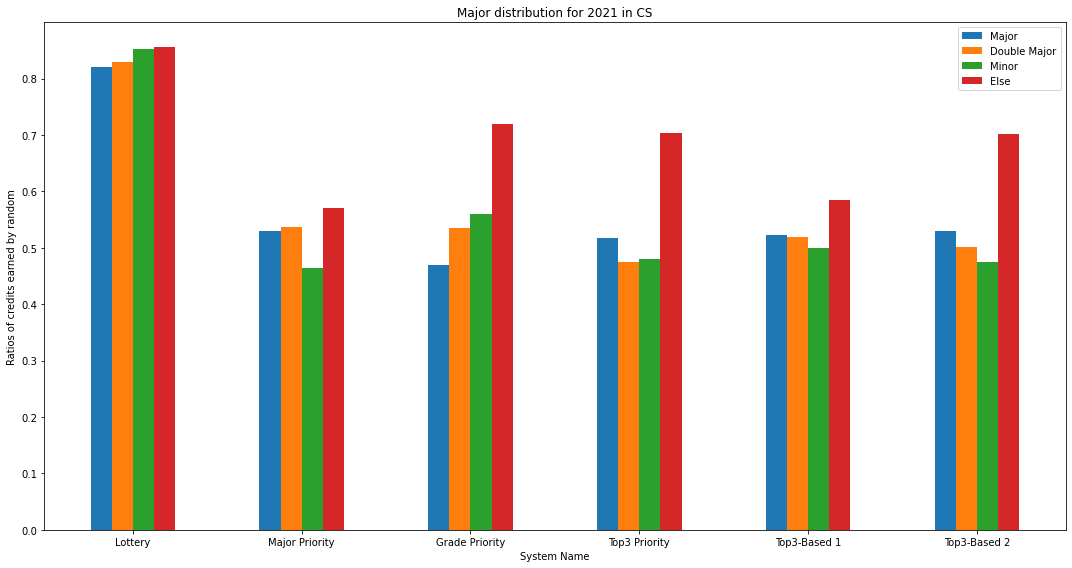

In [59]:
plot_major_bar_plot(major_distributions_dict, threshold=2021)

### Top 3 Priority Performance

In [60]:
top3_distributions_dict = {
    key: get_reactiveness_distribution(students)
    for key, students in result_bachelor_students_dict.items() if "top3" in key.value.lower()
}

#### Top 3 Priority Distribution as Bar Plot

#### 

In [61]:
def plot_top3_bar_plot(top3_distributions_dict):
    plt.figure(figsize=(10,8))
    
    system_keys = [key.value for key in top3_distributions_dict.keys()]
    x_location = np.arange(len(system_keys))
    width = 0.25
    
    aggregated_distributions = []
    for system_key in system_keys:
        top3_distribution = top3_distributions_dict[system_key]
        aggregated_distributions.append(sum(top3_distribution) / len(top3_distribution))

    plt.bar(x_location, aggregated_distributions, width=width, align='center')
    # Mark the axis
    plt.xlabel("System Name")
    plt.xticks(range(len(system_keys)), system_keys)
    plt.ylabel("Number of courses enrolled among top3")
    plt.ylim(2.5, 3)
    
    # Mark the title, labels        
    plt.xticks(x_location, system_keys)
    plt.title(f"Successful Registration Distribution in Top 3")
    plt.tight_layout()
    plt.savefig(plot_save_path / f"top3_bar.png")
    plt.show()
    

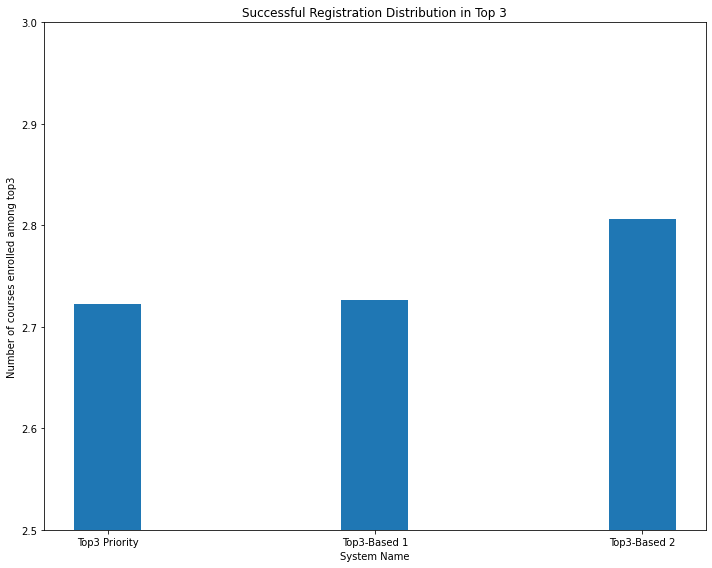

In [62]:
plot_top3_bar_plot(top3_distributions_dict)